# Final Project

In [173]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [1]:
from finlab.data import Data
from finlab.ml import fundamental_features
fdf = fundamental_features()

data = Data()

close = data.get_adj("收盤價")
open_ = data.get_adj("開盤價")
high = data.get_adj("最高價")
low = data.get_adj("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

#bargin_i=data.get("投信買賣超股數")
#bargin_f=data.get("外資自營商買賣超股數")
#bargin_s=data.get("自營商買賣超股數(自行買賣)")
#

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### 計算features

In [175]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [176]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [177]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1


features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,       
}


#### 財報指標

兩個feature結合
[https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7]

In [178]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

#### 技術指標

#### 組合dataset

In [179]:
import pandas as pd

#### 確認各指標清單

In [180]:
#list1=sorted(features)
#list1

In [181]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [182]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15',
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='date', length=214, freq=None)

#### 將dataframe 組裝起來

In [ ]:
for name, f in features_f.items():
    features_f[name] = f.reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.unstack()    

import pandas as pd
dataset = pd.DataFrame(features)    
    
feature_names = list(dataset.columns)

In [103]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [104]:

for name, f in features.items():
    features[name] = f.unstack()

In [105]:
import pandas as pd
dataset = pd.DataFrame(features)

In [17]:
feature_names = list(dataset.columns)

In [18]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

### 分類dataset
 - dataset　　自己拼的
 - dataset_fundamental 財務相關

### 新增 label

In [120]:
list2 = list(dataset_fundamental.columns)

In [107]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

ml.add_profit_prediction(dataset_fundamental)
ml.add_rank_prediction(dataset_fundamental)

In [128]:
feature_names_f = list(dataset_fundamental.columns)

### 刪除太大太小的歷史資料

In [139]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , list1 , thresh=0.01)

print(dataset_drop_extreme_case.shape)

#'----------------------------------------'

print(dataset_fundamental.shape)

def drop_extreme_case_f(dataset_fundamental, feature_names_f, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset_fundamental.index)
    for f in feature_names_f:
        tf = dataset_fundamental[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset_fundamental = dataset_fundamental[~extreme_cases]
    return dataset_fundamental

dataset_drop_extreme_case_f = drop_extreme_case_f(dataset_fundamental , list2 , thresh=0.01)

print(dataset_drop_extreme_case_f.shape)

(436774, 33)
(377755, 33)
(69116, 50)
(50445, 50)


In [140]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

#------------------------------------------------------------

dataset_dropna_f = dataset_drop_extreme_case_f.dropna(how='any')
dataset_dropna_f = dataset_dropna_f.reset_index().set_index("date")

In [141]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-11-15', '2021-12-15', '2022-02-15', '2022-03-15',
               '2022-04-15', '2022-06-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='date', length=377755, freq=None)

In [142]:
##############################################　　　自己加入的　　　##############################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

dataset_dropna_f.index = pd.to_datetime(dataset_dropna_f.index)
dataset_dropna_f = dataset_dropna_f.sort_index()

In [143]:
dataset_train = dataset_dropna[:'2020']
dataset_test = dataset_dropna['2021':]

dataset_train_f = dataset_dropna_f[:'2020']
dataset_test_f = dataset_dropna_f['2021':]

### 機器學習
 - 目前只有三個，技術指標也要在增加一下

#### keras

In [183]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train_f[feature_names_f], dataset_train_f['rank'],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               3200      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225


ValueError: in user code:

    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_8 is incompatible with the layer: expected axis -1 of input shape to have value 31 but received input with shape [None, 50]


##### 結果

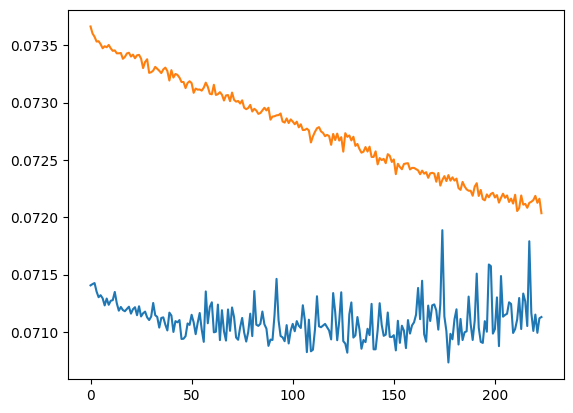

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [148]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.05791987772443696
---predict---
[0.49508018 0.56408623 0.50731124 ... 0.52500276 0.53999209 0.35820635]


##### 參數優化_1110

In [ ]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)


In [149]:
print(gs.best_estimator_)
print('----------------')
print(gs.best_score_)

LGBMClassifier(colsample_bytree=0.4364296729504425, metric='None',
               min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
               n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
               reg_lambda=50, subsample=0.8327756184008888)
----------------
0.562989570009484


In [150]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [171]:
cf = lgb.LGBMRegressor(colsample_bytree=0.4364296729504425, metric='None',
               min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
               n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
               reg_lambda=50, subsample=0.8327756184008888)

cf.fit(dataset_train_f[feature_names_f],dataset_train_f['return'] > 1, **fit_params)
cf.score(dataset_test_f[feature_names_f],dataset_test_f['return'] > 1)

ValueError: Length of feature_name(31) and num_feature(50) don't match

<AxesSubplot:xlabel='Value', ylabel='Feature'>

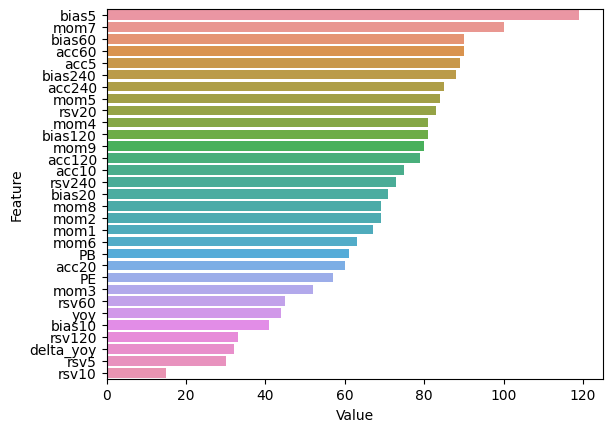

In [152]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [32]:
#print(cf.fit(*train))

In [33]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [34]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [35]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [36]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [153]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])  

RandomForestRegressor()

##### 參數優化_1110

In [154]:
from scipy.stats import randint as sp_randint 
from sklearn.model_selection import RandomizedSearchCV 
# build a classifier 
clf = RandomForestRegressor(n_estimators=100) 
# specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": sp_randint(1, 11), 
              "min_samples_split": sp_randint(2, 11), 
              "min_samples_leaf": sp_randint(1, 11), 
              "bootstrap": [True, False], 
              "criterion": ["mse", "mae"]} 
# run randomized search 
n_iter_search = 20 
rs = RandomizedSearchCV(clf, param_distributions=param_dist, 
                                   n_iter=n_iter_search) 

In [155]:
#rs.fit(dataset_train[features], dataset_train['return'] > 1)

##### Split Train Test dataset

<AxesSubplot:xlabel='Value', ylabel='Feature'>

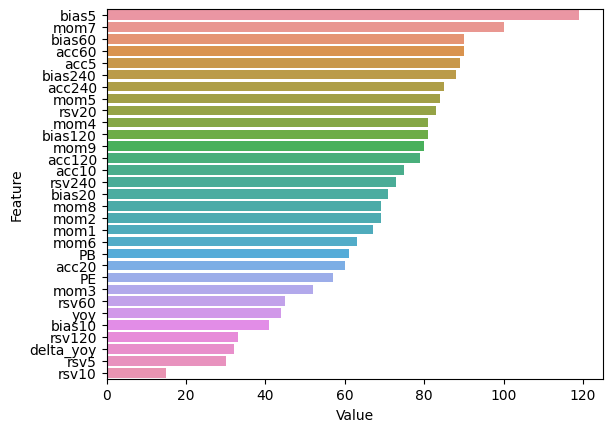

In [156]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [157]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [158]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

## backtest

把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [159]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter

In [160]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

<AxesSubplot:xlabel='date'>

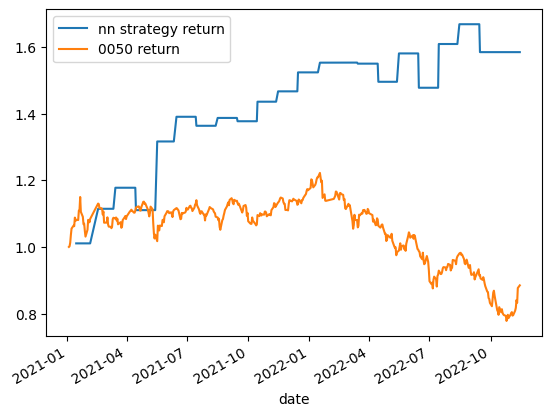

In [161]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , list1 , thresh=0.01)
    
    rank = (dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] ) #* vol_filter.loc[d]


    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [162]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [163]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

In [164]:
#dataset.index.levels[1]

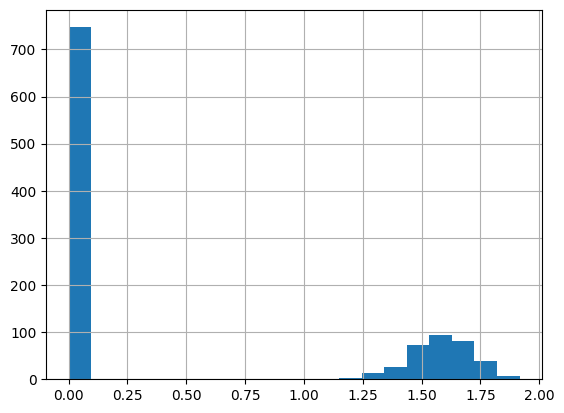

In [165]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, list1 , thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
rank = rank * vol_filter.iloc[-1] #******加上量的濾網

condition = (rank >= rank.nlargest(20).iloc[-1])
#vol_filter

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [166]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [167]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [168]:
close = data.get("收盤價")

money = 60000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1336    0.117878
1560    0.027650
1785    0.095694
2387    0.074349
2474    0.016260
2481    0.051195
2497    0.040214
2610    0.169492
2618    0.115163
2834    0.238095
3324    0.021978
3693    0.043103
4116    0.053476
6125    0.119760
6142    0.302419
6176    0.029268
6223    0.031780
8050    0.041958
8114    0.025424
9914    0.016484
Name: 2022-11-14 00:00:00, dtype: float64